In [1]:
# importing all the required libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Declaring no. of classes and batch size
num_classes = 7
img_rows,img_cols = 48,48
batch_size = 64

In [4]:
# Assigning train and validation Directory
train_data = '/content/drive/MyDrive/Project/images/train'
validation_data = '/content/drive/MyDrive/Project/images/validation'

In [5]:
# Scaling pixals from 1- 255
train_datagenerator = ImageDataGenerator(rescale = 1./255)

validation_datagenerator = ImageDataGenerator(rescale=1./255)

In [6]:
# converting the image to grayscale 
train_gen = train_datagenerator.flow_from_directory(
					train_data,
					color_mode='grayscale',
					target_size=(img_rows,img_cols),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_gen = validation_datagenerator.flow_from_directory(
							validation_data,
							color_mode='grayscale',
							target_size=(img_rows,img_cols),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [7]:
# adding sequential type of neural network and adding layers
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [8]:
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [9]:
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [10]:
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [11]:
model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [12]:
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [13]:
model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [14]:
# This is the model summary, shows the number of layers , params and output shape
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                        

In [15]:
# Declaring Hyper parameters
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [16]:
# Training the Neural Network
nb_train_samples = train_gen.samples
nb_validation_samples = validation_gen.samples
epochs=25

history=model.fit_generator(
                train_gen,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                validation_data = validation_gen,
                validation_steps = nb_validation_samples//batch_size)

<ipython-input-16-ab160b013368>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/25
450/450 [==============================] - 8863s 20s/step - loss: 2.2225 - accuracy: 0.2150 - val_loss: 1.6746 - val_accuracy: 0.3449
Epoch 2/25
450/450 [==============================] - 473s 1s/step - loss: 1.5586 - accuracy: 0.3908 - val_loss: 1.3897 - val_accuracy: 0.4714
Epoch 3/25
450/450 [==============================] - 474s 1s/step - loss: 1.3435 - accuracy: 0.4867 - val_loss: 1.2308 - val_accuracy: 0.5312
Epoch 4/25
450/450 [==============================] - 473s 1s/step - loss: 1.2402 - accuracy: 0.5289 - val_loss: 1.1878 - val_accuracy: 0.5558
Epoch 5/25
450/450 [==============================] - 474s 1s/step - loss: 1.1753 - accuracy: 0.5620 - val_loss: 1.1184 - val_accuracy: 0.5783
Epoch 6/25
450/450 [==============================] - 477s 1s/step - loss: 1.1098 - accuracy: 0.5904 - val_loss: 1.1701 - val_accuracy: 0.5707
Epoch 7/25
450/450 [==============================] - 476s 1s/step - loss: 1.0590 - accuracy: 0.6121 - val_loss: 1.0871 - val_accuracy: 0.59

In [17]:
model.save('mymodel.h5')

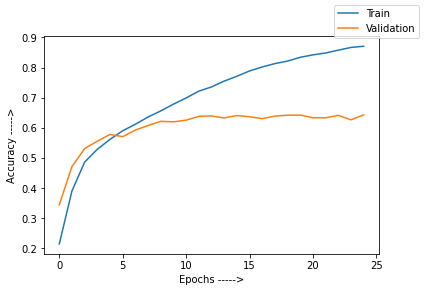

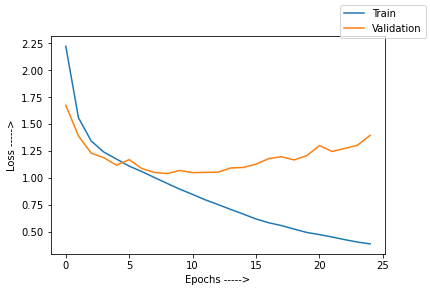

In [18]:
from matplotlib import pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


ax1 = plt.figure(0)
plt.plot(acc,label = 'Train')
plt.plot(val_acc, label = 'Validation')
plt.xlabel('Epochs ----->')
plt.ylabel('Accuracy ----->')
leg = ax1.legend()


ax2 = plt.figure(1)
plt.plot(loss,label = 'Train')
plt.plot(val_loss,label = 'Validation')
plt.xlabel('Epochs ----->')
plt.ylabel('Loss ----->')
leg = ax2.legend()

In [19]:
import cv2

import numpy as np

import tensorflow as tf


In [20]:
classes = ['angry','disguisted','fearful','happy','neutral','sad','suprised']


IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
1/1 [==============================] - 0s 284ms/step
Predicted Emotion is: fearful


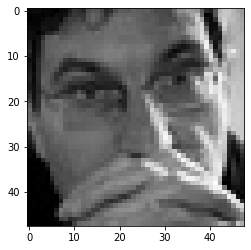

In [21]:
I1 = cv2.imread('/content/drive/MyDrive/Project/images/validation/fear/10099.jpg')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
1/1 [==============================] - 0s 18ms/step
Predicted Emotion is: angry


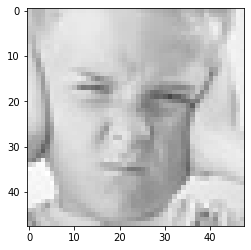

In [23]:
I1 = cv2.imread('/content/drive/MyDrive/Project/images/validation/angry/10079.jpg')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
1/1 [==============================] - 0s 18ms/step
Predicted Emotion is: disguisted


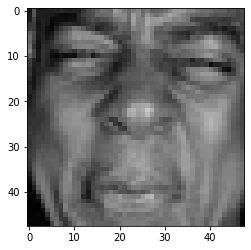

In [24]:
I1 = cv2.imread('/content/drive/MyDrive/Project/images/validation/disgust/10435.jpg')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
1/1 [==============================] - 0s 21ms/step
Predicted Emotion is: happy


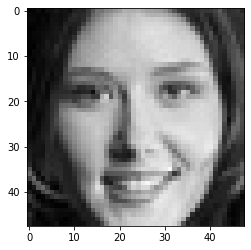

In [28]:
I1 = cv2.imread('/content/drive/MyDrive/Project/images/validation/happy/10362.jpg')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))


IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
1/1 [==============================] - 0s 18ms/step
Predicted Emotion is: neutral


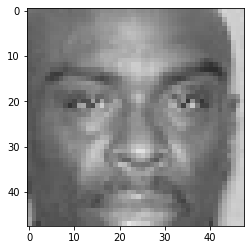

In [30]:
I1 = cv2.imread('/content/drive/MyDrive/Project/images/validation/neutral/10266.jpg')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
1/1 [==============================] - 0s 21ms/step
Predicted Emotion is: sad


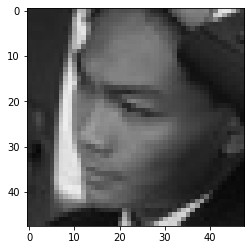

In [31]:
I1 = cv2.imread('/content/drive/MyDrive/Project/images/validation/sad/1026.jpg')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
1/1 [==============================] - 0s 20ms/step
Predicted Emotion is: suprised


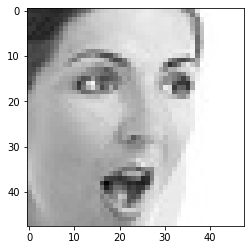

In [32]:
I1 = cv2.imread('/content/drive/MyDrive/Project/images/validation/surprise/10545.jpg')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))